In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
top_10000_train = pd.read_csv('Scrobble_Features.csv')
user_history_train = pd.read_json('user_history.json')


In [67]:
top_10000_train.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_popularity,spotify_track_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,Hide in Your ShellSupertramp,Supertramp,Hide in Your Shell,"['album rock', 'art rock', 'classic rock', 'gl...",0ldE7rHWykc9OUViCzdviV,NaN,409889.0,51.0,False,...,7.0,-12.843,0.0,0.0429,0.471000,0.000074,0.2970,0.319,111.667,4.0
1,1,Vento k h o,o k h o,Vent,"['chillhop', 'lo-fi beats', 'phonk']",3wJTCCMHtuOdDg4fJzkd0i,https://p.scdn.co/mp3-preview/17715e8450561f32...,164935.0,54.0,False,...,10.0,-9.398,0.0,0.0783,0.513000,0.219000,0.1710,0.224,77.703,4.0
2,2,Cesaro SummabilityTool,Tool,Cesaro Summability,"['alternative metal', 'alternative rock', 'art...",6xttnk5U2VMVCaihaD0RPE,https://p.scdn.co/mp3-preview/e12b11bf6cdcdff4...,86226.0,46.0,False,...,11.0,-21.736,0.0,0.1910,0.000799,0.779000,0.0832,0.196,115.350,4.0
3,3,Dyslexic HeartPaul Westerberg,Paul Westerberg,Dyslexic Heart,"['alternative country', 'alternative pop', 'al...",6h0lrpGtRIwbBiPHthDB3o,https://p.scdn.co/mp3-preview/ab43e42aa0b89500...,271200.0,49.0,False,...,0.0,-5.064,1.0,0.0292,0.039100,0.000004,0.1280,0.843,136.575,4.0
4,4,Loan Me A DimeBoz Scaggs,Boz Scaggs,Loan Me A Dime,"['adult standards', 'album rock', 'art rock', ...",05LTrpC9z6YpTPmaeGC9kQ,https://p.scdn.co/mp3-preview/595502b0217df464...,751920.0,44.0,False,...,9.0,-10.518,0.0,0.0377,0.309000,0.057700,0.2870,0.382,139.957,4.0
5,5,To the WorldWitrash,Witrash,To the World,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,The Wreck of the Edmund FitzgeraldGordon Light...,Gordon Lightfoot,The Wreck of the Edmund Fitzgerald,"['album rock', 'canadian country', 'canadian f...",536L9C0N7vhYdibCJx3cI2,https://p.scdn.co/mp3-preview/0ba5642161214b5a...,389280.0,59.0,False,...,4.0,-15.240,1.0,0.0626,0.116000,0.000003,0.1660,0.158,186.047,3.0
7,7,IonsShredders,Shredders,Ions,"['abstract hip hop', 'minnesota hip hop']",1DPvwjfw97lQBPlqJ155gn,https://p.scdn.co/mp3-preview/15fbc6ada9411621...,195937.0,29.0,True,...,4.0,-6.671,0.0,0.1780,0.013600,0.000000,0.0751,0.439,80.024,4.0
8,8,The Middle - Acoustic VersionJimmy Eat World,Jimmy Eat World,The Middle - Acoustic Version,"['modern rock', 'neo mellow', 'pop punk', 'pop...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Easy RiderEddie Berman,Eddie Berman,Easy Rider,"['chamber pop', 'deep new americana', 'indie f...",3MCaKeccHJ13bLYCEQtQFq,https://p.scdn.co/mp3-preview/571f8cd7145f607e...,229800.0,51.0,False,...,4.0,-10.222,1.0,0.0263,0.499000,0.017000,0.1100,0.326,115.359,4.0


In [68]:
user_history_train.head(10)

,ts,platform,ms_played,conn_country,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,reason_start,reason_end,shuffle,offline,offline_timestamp,incognito_mode
0,2021-09-04T10:12:23Z,Windows 10 (10.0.22000; x64; AppX),7130,LK,Broke In A Minute,Tory Lanez,The New Toronto 3,spotify:track:4xqIYGwwZTEem9U8A42SPF,playbtn,endplay,False,False,1630750333278,False
1,2021-09-04T10:16:20Z,Windows 10 (10.0.22000; x64; AppX),237714,LK,Bonnona,DJ JNK,Bonnona,spotify:track:6ahGShWSkIHVoBd278gYnC,clickrow,trackdone,False,False,1630750341690,False
2,2021-09-04T10:17:08Z,Windows 10 (10.0.22000; x64; AppX),47045,LK,Broken People (Originally Performed by Logic &...,Covered Up,"Chart Backing Tracks 2017, Vol. 14",spotify:track:0MONybFd78nzNA7Au93yb2,trackdone,endplay,False,False,1630750578721,False
3,2021-09-04T10:19:41Z,Windows 10 (10.0.22000; x64; AppX),32500,LK,ブルーバード,Ikimonogakari,Chou Ikimonobakari Tennen Kinen Members Best S...,spotify:track:2XpV9sHBexcNrz0Gyf3l18,clickrow,endplay,False,False,1630750627276,False
4,2021-09-04T10:22:57Z,Windows 10 (10.0.22000; x64; AppX),197298,LK,The Bones - with Hozier,Maren Morris,The Bones,spotify:track:1yTTMcUhL7rtz08Dsgb7Qb,clickrow,trackdone,False,False,1630750779709,False
5,2021-09-04T10:33:41Z,Windows 10 (10.0.22000; x64; AppX),9351,LK,BELIEVE IT,PARTYNEXTDOOR,New Music 2020 Chart,spotify:track:4vLUkw4SPpvzMBlxiykT8B,trackdone,logout,False,False,1630750976396,False
6,2021-09-04T10:49:02Z,Windows 10 (10.0.22000; x64; AppX),148759,LK,Camelot,NLE Choppa,Camelot,spotify:track:4sWuPniHClkInYAnzXAYUF,clickrow,trackdone,False,False,1630752392325,False
7,2021-09-04T10:51:09Z,Windows 10 (10.0.22000; x64; AppX),126824,LK,Coffee,beabadoobee,Coffee,spotify:track:429NtPmr12aypzFH3FkN9l,trackdone,trackdone,False,False,1630752541046,False
8,2021-09-04T10:51:35Z,Windows 10 (10.0.22000; x64; AppX),23866,LK,Chicken Tenders,Dominic Fike,Chicken Tenders,spotify:track:3D8sT8D3f5egWSQnF0fbqu,trackdone,endplay,False,False,1630752668386,False
9,2021-09-04T11:35:27Z,Windows 10 (10.0.22000; x64; AppX),54750,LK,Girls Want Girls (with Lil Baby),Drake,Certified Lover Boy,spotify:track:37Nqx7iavZpotJSDXZWbJ3,clickrow,logout,False,False,1630752693723,False


In [69]:

def plot_training_data(df, column, n):
    value_counts = df[column].value_counts()
    top_n = value_counts.head(n)

    plt.figure(figsize=(10, 5))
    top_n.plot(kind='bar', color='skyblue')
    plt.title(f'Top {n} {column} values')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_histogram(df, column_name, n=1000, bins=30):
    # Ambil data kolom yang diinginkan dan batasi pada n data pertama
    data = df[column_name].dropna()
    data = data.head(n)
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color="skyblue", edgecolor="black", alpha=0.7)
    
    # Memberikan judul dan label pada sumbu
    plt.title(f'Distribusi {column_name} (Histogram)')
    plt.xlabel(column_name)
    plt.ylabel('Jumlah Data')
    
    # Menampilkan plot
    plt.show()

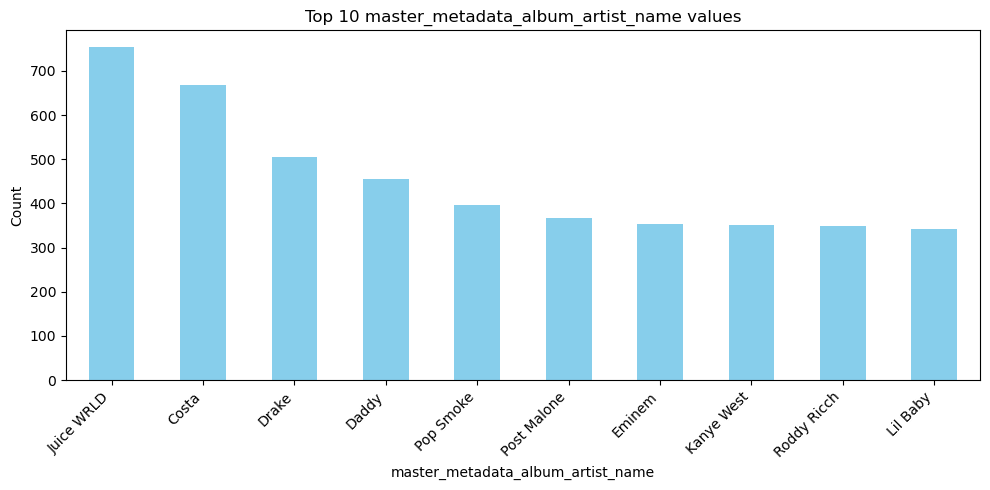

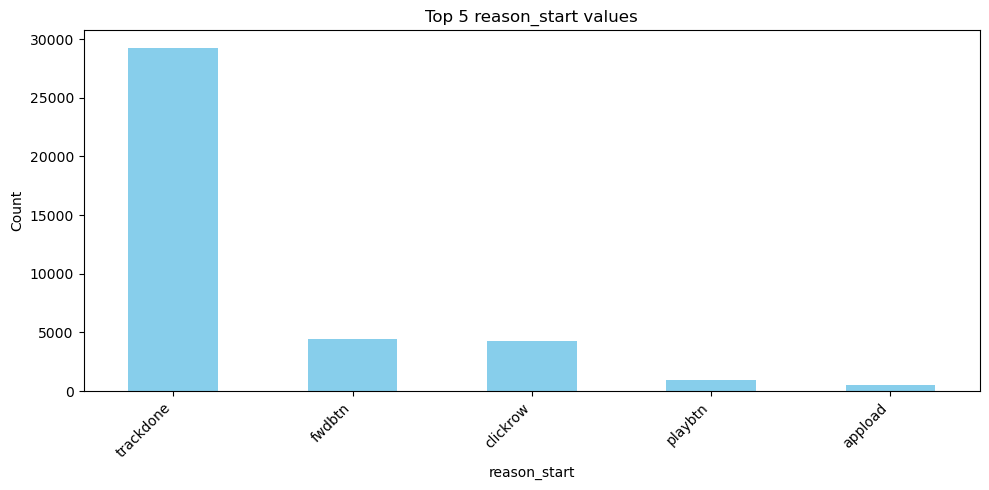

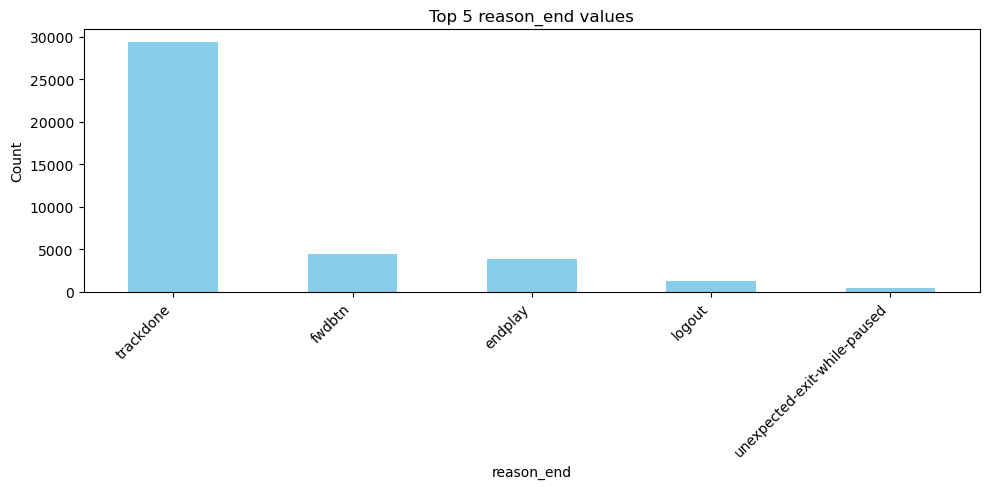

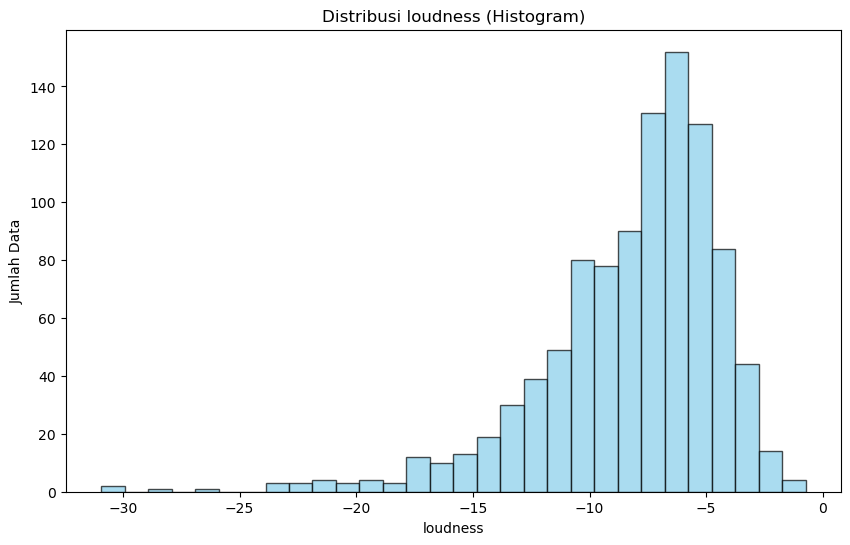

In [70]:
plot_training_data(user_history_train, "master_metadata_album_artist_name", n=10)
plot_training_data(user_history_train, "reason_start", n=5)
plot_training_data(user_history_train, "reason_end", n=5)

plot_histogram(top_10000_train, "loudness", n=1000, bins=30)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=33c5d346-6bff-45f7-af8d-4b44c857ba6b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>